**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: ANGEL ISAAC MARTÍNEZ OLIVARES

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [5]:
happiness = pd.read_csv("/content/drive/MyDrive/Diplomado Data Scientist/Visualización de datos con Python/happiness_report.csv")
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice. 

In [6]:
mexico = happiness[happiness["Country or region"]=="Mexico"]
mexico.set_index("Country or region",inplace=True)
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto. 

Text(6.595, 0, 'MEX')

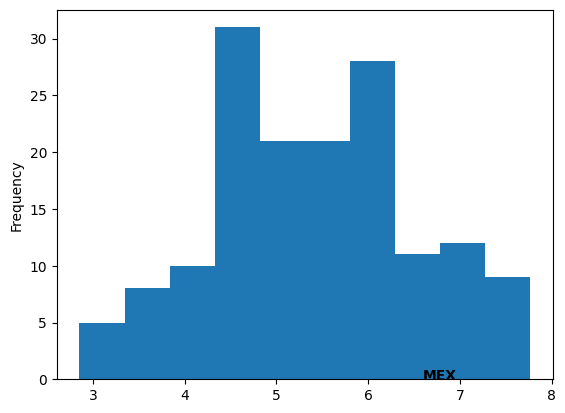

In [7]:
axs = happiness['Score'].plot(kind='hist')
props_font = {"weight":"bold",
              "color":"Black"}
axs.text(happiness[happiness["Country or region"]=="Mexico"]["Score"].to_list()[0],0,"MEX",fontdict=props_font)

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

Text(0.861, 0.861, 'MEX')

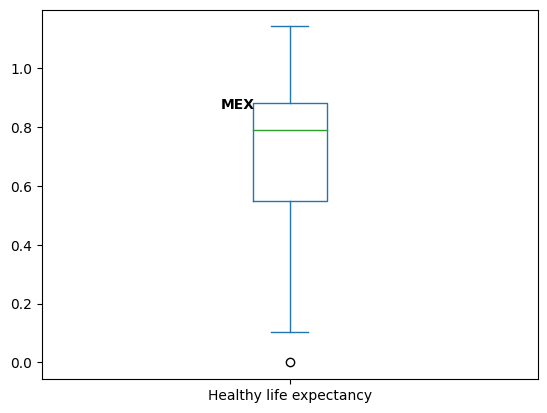

In [35]:
axs = happiness["Healthy life expectancy"].plot(kind="box")
props_font = {"weight":"bold",
              "color":"black"}
axs.text(happiness[happiness["Country or region"]=="Mexico"]["Healthy life expectancy"].to_list()[0],0.861,"MEX",fontdict=props_font)


6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

In [9]:
mexico2 = mexico.drop(["Overall rank","Score"],axis=1,inplace=True)
mexico2 = mexico.T
mexico2

<ipython-input-9-69dfdd5174a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mexico2 = mexico.drop(["Overall rank","Score"],axis=1,inplace=True)


Country or region,Mexico
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


Text(0, 0.5, '')

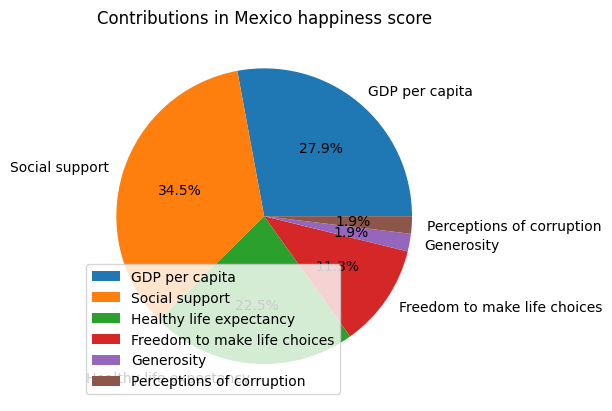

In [10]:
ax2 = mexico2.plot.pie(y='Mexico',labels=mexico2.index,autopct='%1.1f%%')
ax2.set_title('Contributions in Mexico happiness score')
ax2.set_ylabel('')

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

In [11]:
happiest_countries = happiness[happiness["Country or region"].isin(["Finland","South Sudan","Mexico","Norway","Denmark"])]
happiest_countries.set_index("Country or region",inplace=True)
happiest_countries

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
Mexico,23,6.595,1.070,1.323,0.861,0.433,0.074,0.073
South Sudan,156,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [12]:
happiness2 = happiest_countries.drop(columns=["Overall rank","Score"])
happiness2

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,
Finland,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,1.383,1.573,0.996,0.592,0.252,0.410
Norway,1.488,1.582,1.028,0.603,0.271,0.341
Mexico,1.070,1.323,0.861,0.433,0.074,0.073
South Sudan,0.306,0.575,0.295,0.010,0.202,0.091


<Axes: title={'center': 'World Happiness Report'}, xlabel='Country or region', ylabel=' '>

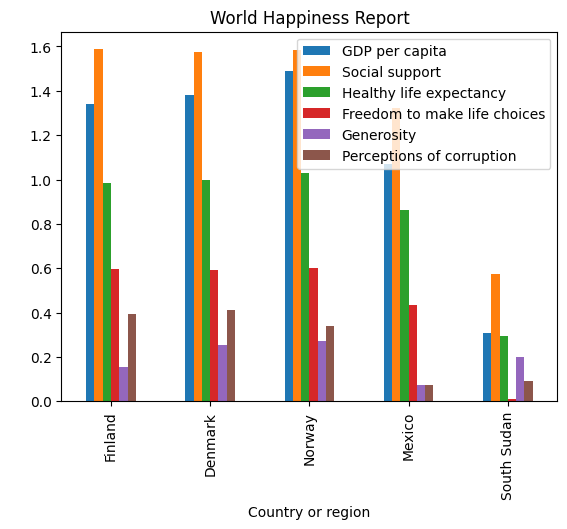

In [13]:
happiness2.plot.bar(title="World Happiness Report",ylabel=" ")

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

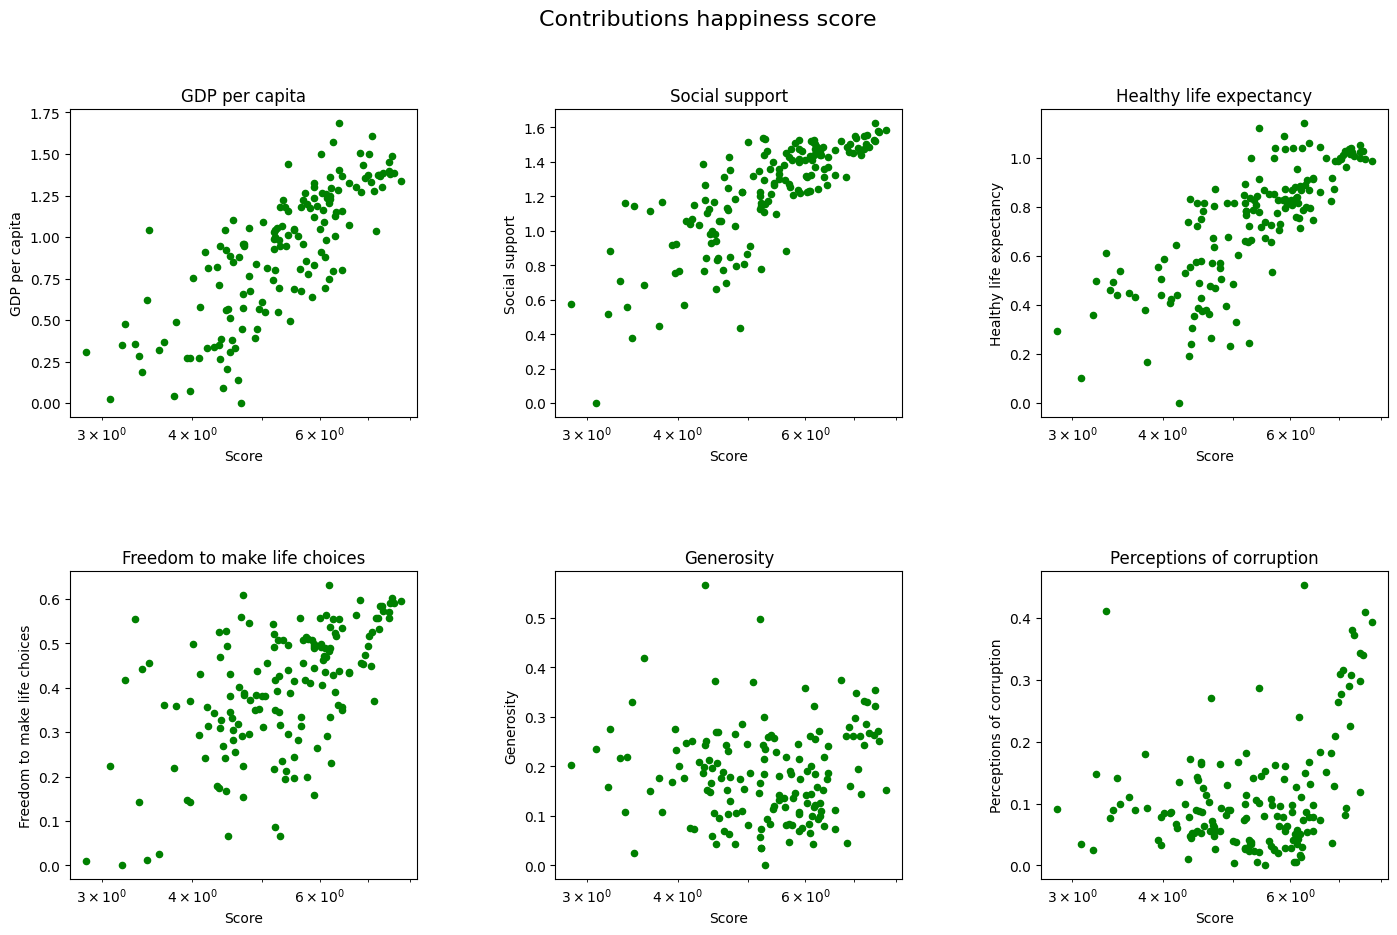

In [49]:
fig = plt.figure(figsize=(17,10)) 
fig.suptitle('Contributions happiness score',fontsize=16) 
plt.subplots_adjust(wspace=0.4,hspace=0.5)


ax1 = fig.add_subplot(231)
happiness.plot(kind='scatter',x='Score',y='GDP per capita',color='green',logx=True,ax=ax1)
ax1.set_title('GDP per capita')

ax2 = fig.add_subplot(232)
happiness.plot(kind='scatter',x='Score',y='Social support',color='green',logx=True,ax=ax2)
ax2.set_title('Social support')

ax3 = fig.add_subplot(233)
happiness.plot(kind='scatter',x='Score',y='Healthy life expectancy',color='green',logx=True,ax=ax3)
ax3.set_title('Healthy life expectancy')

ax4 = fig.add_subplot(234)
happiness.plot(kind='scatter',x='Score',y='Freedom to make life choices',color='green',logx=True,ax=ax4)
ax4.set_title('Freedom to make life choices')

ax5 = fig.add_subplot(235)
happiness.plot(kind='scatter',x='Score',y='Generosity',color='green',logx=True,ax=ax5)
ax5.set_title('Generosity')

ax6 = fig.add_subplot(236)
happiness.plot(kind='scatter',x='Score',y='Perceptions of corruption',color='green',logx=True,ax=ax6)
ax6.set_title('Perceptions of corruption')

plt.show()

9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

<ipython-input-51-6b4ffa2b71be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(happiness.corr(),2),annot=True)


<Axes: >

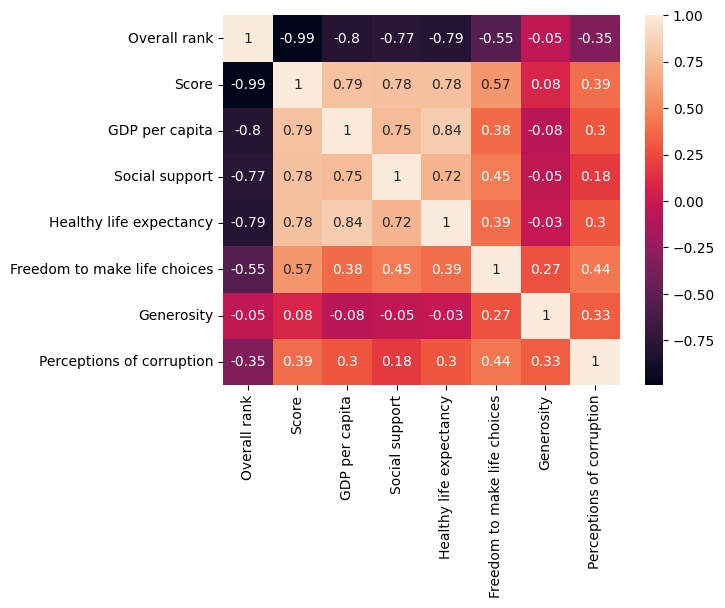

In [51]:
sns.heatmap(round(happiness.corr(),2),annot=True)

10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región. 

In [95]:
metadata = pd.read_csv("/content/drive/MyDrive/Diplomado Data Scientist/Visualización de datos con Python/Metadata.csv")
metadata

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra
...,...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo
259,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia


In [96]:
metadata.rename(str.lower, axis='columns')
metadata.rename(columns = {'TableName':'Country or region'}, inplace = True)
metadata

,Country Code,Region,IncomeGroup,SpecialNotes,Country or region
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra
...,...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo
259,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia


In [76]:
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [109]:
happiness_region = metadata.merge(happiness,on='Country or region')
happiness_region = happiness_region.drop(["Country Code","IncomeGroup","SpecialNotes","Country or region","Overall rank","GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"],axis=1)
#happiness_region.set_index('Region',inplace=True)
happiness_region = happiness_region[['Region','Score']].groupby(['Region']).mean()
happiness_region

,Score
Region,
East Asia & Pacific,5.658769
Europe & Central Asia,6.104174
Latin America & Caribbean,6.007579
Middle East & North Africa,5.757429
North America,7.085000
South Asia,4.526857
Sub-Saharan Africa,4.260000


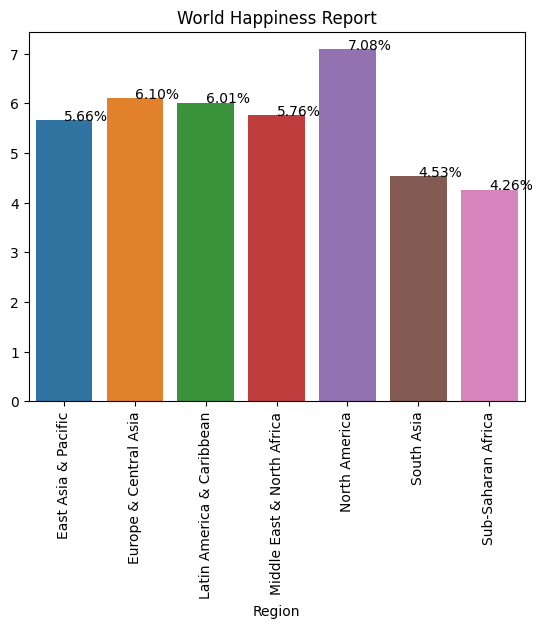

In [111]:
sns.barplot(x=happiness_region.index,y='Score',data=happiness_region)
plt.title('World Happiness Report')
plt.ylabel('')
plt.xticks(rotation=90)
for i in range(happiness_region.shape[0]):
  plt.text(i,happiness_region.iloc[i,0],str(f'{happiness_region.iloc[i,0]:.2f}')+'%')